In [14]:
import pandas as pd
import geopandas
import numpy as np
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import MapView

In [3]:
basal_contacts = geopandas.read_file('./interactive_model-test2/tmp/'+'basal_contacts.shp')
tangent = pd.read_csv('./interactive_model-test2/tmp/'+'raw_contacts.csv')

In [4]:
import matplotlib.pyplot as plt
lines = []
for line in basal_contacts.geometry: # loop through line segments
    points = []
    for subline in line:
        points.append([subline.coords[1][0],subline.coords[1][1]])
    
    lines.append(np.array(points))

In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/

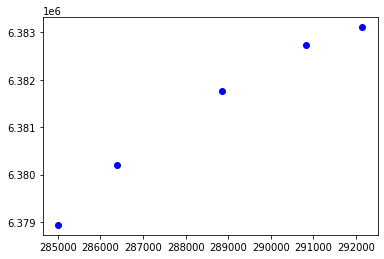

In [5]:
i = 12
plt.plot(lines[i][:,0],lines[i][:,1],'bo')
tangents = []
for l in lines:
    line_tangents = []
    for i in range(len(l)):
        if i+1 > len(l)-1:
            line_tangents.append([l[i-1,0]-l[i,0],l[i-1,1]-l[i,1]])
            continue
        line_tangents.append([l[i,0]-l[i+1,0],l[i,1]-l[i+1,1]])
    tangents.append(np.array(line_tangents))

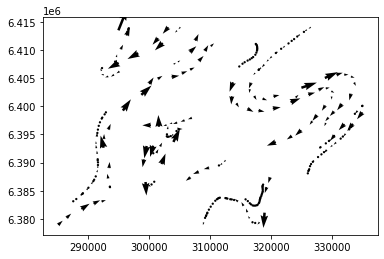

In [6]:
for i in range(len(lines)):
    plt.quiver(lines[i][:,0],lines[i][:,1],tangents[i][:,0],tangents[i][:,1],scale=100000)
    

In [7]:
derivatives = []
for i in range(len(tangents)):
    line_derivative = []
    for j in range(1,len(tangents[i])-1):
        dx = tangents[i][j-1,0]-tangents[i][j+1,0]
        dy = tangents[i][j-1,1]-tangents[i][j+1,1]
        dot = np.dot(tangents[i][j-1,:]/np.linalg.norm(tangents[i][j-1,:]),tangents[i][j+1,:]/np.linalg.norm(tangents[i][j+1,:]))
        line_derivative.append([dx,dy,lines[i][j,0],lines[i][j,1],dot])
    if len(line_derivative) > 0:
        derivatives.append(np.array(line_derivative))

In [8]:
dot = []
x = []
y = []
for d in derivatives:
    dot.extend(d[:,4].tolist())
    x.extend(d[:,2].tolist())
    y.extend(d[:,3].tolist())

In [9]:
from scipy.ndimage.filters import gaussian_filter

def myplot(x, y, s, model=None, bins=1000):
    crange = None
    if model:
        crange = [[model.origin[0],model.maximum[0]],
                  [model.origin[1],model.maximum[1]]]
    heatmap, xedges, yedges = np.histogram2d(x, y, range=crange, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

In [30]:
bb = pd.read_csv('./interactive_model-test2/tmp/bbox.csv')
origin = bb[['minx','miny','lower']].to_numpy()[0]
maximum = bb[['maxx','maxy','upper']].to_numpy()[0]
# [ 250805.15298565 6405084.32805869  336682.92153939 6458336.08597563]

In [31]:
model = GeologicalModel(origin,maximum)

In [32]:
model.origin

array([ 2.85003181e+05,  6.37742054e+06, -3.20000000e+03])

Text(0.5, 1.0, 'C. Key locality map')

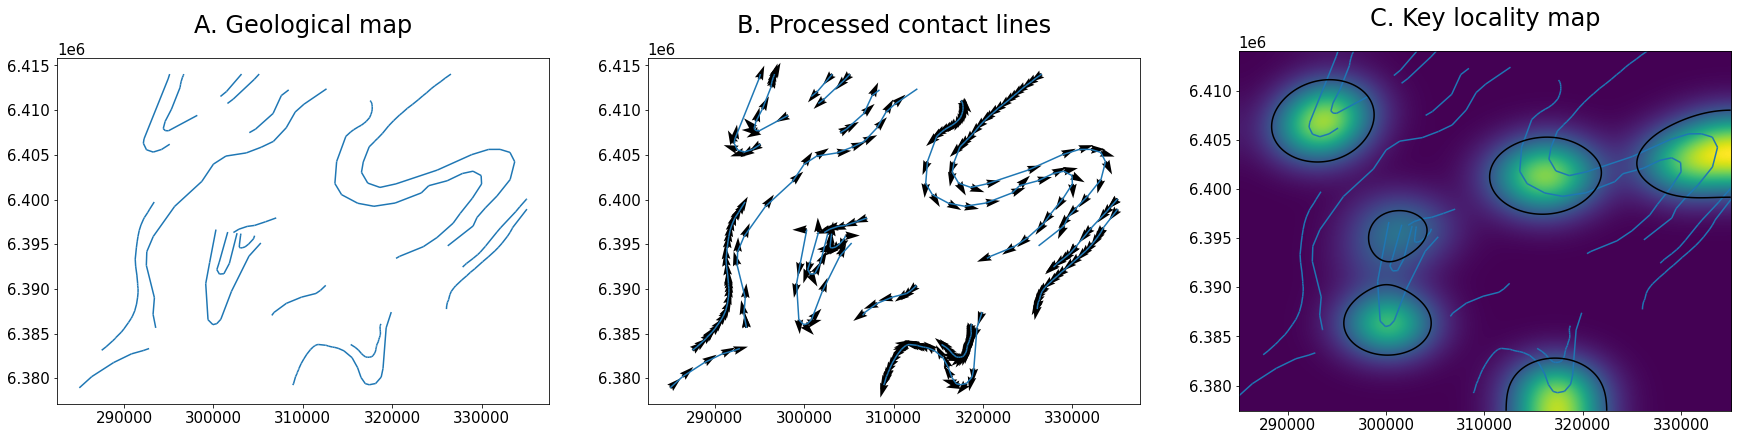

In [37]:
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size*1.2,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)


fig, ax = plt.subplots(1,3,figsize=(30,10))
key_localities = np.zeros((300,3))
key_localities[:,2] = 1.
ki = 0
for d in derivatives:
#     try:
#         ax[2].scatter(d[:,2],d[:,3],c=np.rad2deg(np.cos(np.abs(d[:,4]))),vmin=np.min(np.rad2deg(np.cos(np.abs(dot)))),vmax=np.max(np.rad2deg(np.cos(np.abs(dot)))),cmap='rainbow',s=40)
#     #     break
# #         ax[1].scatter(d[:,2],d[:,3],c=d[:,0])
#     except:
# #         print(d)
#         pass
    try:
        mask = np.rad2deg(np.cos(np.abs(d[:,4]))) > 45
#         ax[0].plot(d[mask,2],d[mask,3],'ro')#c=np.rad2deg(np.cos(np.abs(d[:,4]))),vmin=np.min(np.rad2deg(np.cos(np.abs(dot)))),vmax=np.max(np.rad2deg(np.cos(np.abs(dot)))),cmap='rainbow',s=40)
    #     break
#         ax[1].scatter(d[:,2],d[:,3],c=d[:,0])
        key_localities[ki:np.sum(mask)+ki,0] = d[mask,2]
        key_localities[ki:np.sum(mask)+ki,1] = d[mask,3]

        ki+=np.sum(mask)
    except:
#         print(d)
        pass
basal_contacts.plot(ax=ax[0])
basal_contacts.plot(ax=ax[2])

for i in range(len(lines)):
    temp_tangents = tangents[i][:,:2]/np.linalg.norm(tangents[i][:,:2],axis=1)[:,None]
    ax[1].quiver(lines[i][:,0],lines[i][:,1],temp_tangents[:,0],temp_tangents[:,1],scale=5,scale_units='inches')
basal_contacts.plot(ax=ax[1])
heatmap, extent = myplot(key_localities[:ki,0],key_localities[:ki,1],65,model=model)
# proj.config.geol_clip.plot('colour_index',ax=ax[0],cmap='tab20')
# proj.config.structure_clip.plot(ax=ax[0])
# mapview = MapView(model,ax=ax[0])
# mapview.add_data(model['supergroup_0'],dip=False,val=False,symb_scale=750)
cax = ax[2].imshow(heatmap,origin='lower',extent=extent)#(model.origin[0],model.maximum[0],model.origin[1],model.maximum[1]))
ax[2].contour(heatmap,levels=[0.00006],colors='black',origin='lower',extent=extent)#(model.origin[0],model.maximum[0],model.origin[1],model.maximum[1]))
# plt.colorbar(cax)
# basal_contacts.plot(ax=plt.gca())
ax[0].set_title('A. Geological map')
ax[1].set_title('B. Processed contact lines')
ax[2].set_title('C. Key locality map')

In [40]:
structures  = geopandas.read_file('./interactive_model-test2/tmp/structure_clip.shp')

<AxesSubplot:>

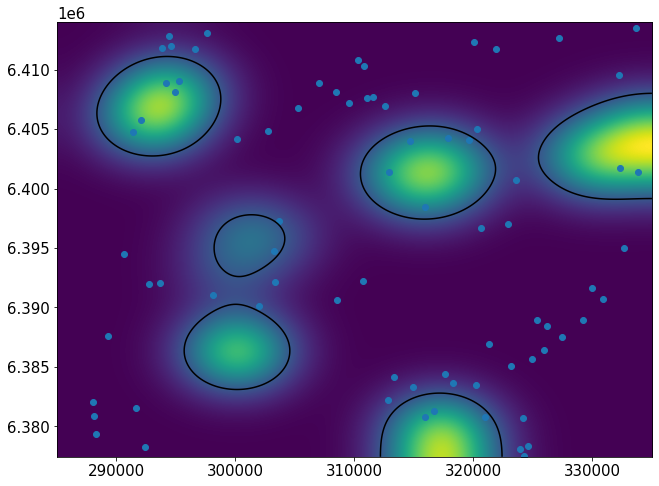

In [41]:
cax = plt.imshow(heatmap,origin='lower',extent=extent)#(model.origin[0],model.maximum[0],model.origin[1],model.maximum[1]))
plt.contour(heatmap,levels=[0.00006],colors='black',origin='lower',extent=extent)
structures.plot(ax=plt.gca())

In [45]:
structures.columns

Index(['INCLINATIO', 'AZIMUTH_TR', 'YOUNGING', 'STRUCTURE_', 'index_righ',
       'index', 'GLCODE', 'MAPUNIT', 'MAINUNIT', 'AGE', 'STRATNAME',
       'STRATDESC', 'GISCODE', 'PARENTNAME', 'PARENTSYMB', 'PROVINCE',
       'MAXAGE', 'MAXMOD', 'MAXMETH', 'MINAGE', 'MINMOD', 'MINMETH', 'MAPSYMB',
       'STRATNAM_1', 'RELAGE', 'min', 'max', 'ave', 'ID', 'r1', 'r2',
       'geometry'],
      dtype='object')

In [47]:
orientations = pd.read_csv('./interactive_model-test2/output/contact_orientations.csv')
orientations_xy = orientations[['X','Y']].to_numpy()

In [54]:
from scipy.interpolate import RegularGridInterpolator
x=np.linspace(model.origin[0],model.maximum[0],heatmap.shape[0])
y=np.linspace(model.origin[1],model.maximum[1],heatmap.shape[1])
dtm_interpolator = RegularGridInterpolator((x,y),heatmap.T)
#         inside = self._is_inside(xy)
interpolated_dtm =np.zeros(orientations_xy.shape[0])
interpolated_dtm[:] = np.nan
interpolated_dtm[:] = dtm_interpolator(orientations_xy[:,:])
interpolated_dtm

array([7.45746382e-05, 2.27795727e-06, 1.90021086e-06, 2.29910857e-06,
       3.23736012e-06, 6.22723822e-07, 1.82798011e-05, 1.71911627e-04,
       7.01247776e-05, 6.23037279e-05, 3.31461483e-05, 1.38227021e-05,
       4.92522810e-06, 3.06587198e-07, 2.26431678e-05, 5.84001438e-05,
       1.47567495e-04, 7.40809020e-05, 1.68222947e-07, 8.48694971e-07,
       1.25979795e-05, 1.41216772e-05, 8.78076261e-06, 8.07141086e-06,
       8.10685331e-06, 2.06661614e-05, 1.38278198e-04, 1.28601287e-04,
       3.08537062e-10, 1.02486011e-10, 3.05571613e-07, 7.34784835e-06,
       1.57340953e-04, 1.15378419e-04, 1.61534003e-04, 2.03515240e-05,
       6.28226101e-07, 3.72897876e-08, 1.61879520e-04, 1.54833151e-05,
       1.33045480e-04, 9.65836478e-05, 4.07856662e-05, 4.75992785e-06,
       7.49001287e-07, 2.12777753e-07])

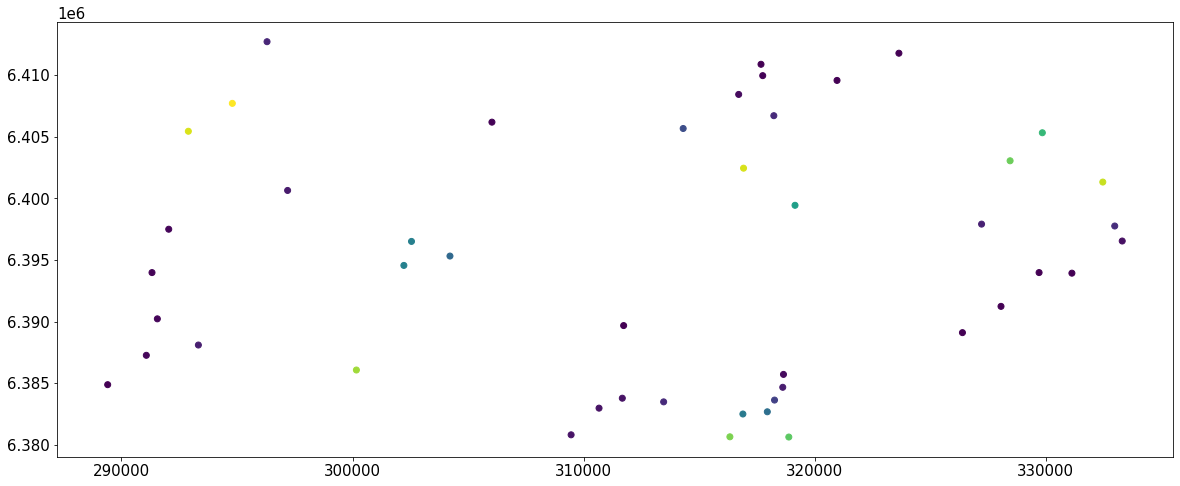

In [55]:
plt.scatter(orientations_xy[:,0],orientations_xy[:,1],c=interpolated_dtm)

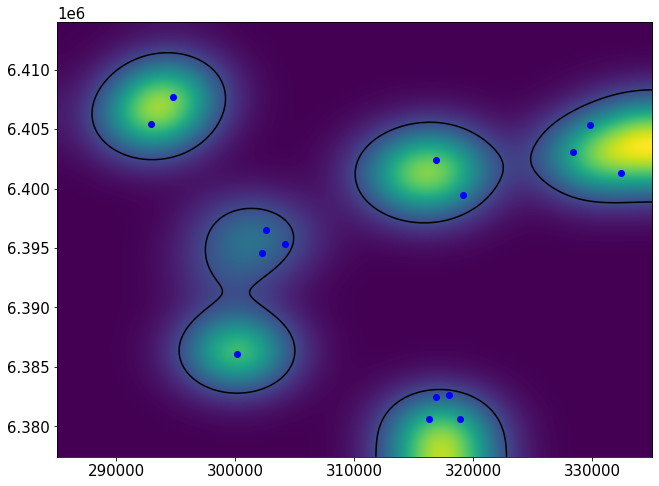

In [59]:
thresh = 0.00005
plt.plot(orientations_xy[interpolated_dtm>thresh,0],orientations_xy[interpolated_dtm>thresh,1],'bo')
cax = plt.imshow(heatmap,origin='lower',extent=extent)#(model.origin[0],model.maximum[0],model.origin[1],model.maximum[1]))
plt.contour(heatmap,levels=[thresh],colors='black',origin='lower',extent=extent)

In [ ]:
plt.